### QED-C Prototype Benchmarks - Qiskit Version
The notebook contains a suite of prototype application benchmarks for the IBM Qiskit API.
Configure and run the cell below with the desired execution settings.
Then execute the remaining cells, each containing one prototype benchmark program.

In [1]:
min_qubits=2
max_qubits=8
max_circuits=3
num_shots=1000

backend_id="qasm_simulator"
hub="ibm-q"; group="open"; project="main"
provider_backend = None
exec_options = None

# # *** If using IBMQ hardware, run this once to authenticate
# from qiskit import IBMQ
# IBMQ.save_account('YOUR_API_TOKEN_HERE')

# # *** If you are part of an IBMQ group, set hub, group, and project name here
# hub="YOUR_HUB_NAME"
# group="YOUR_GROUP_NAME"
# project="YOUR_PROJECT_NAME"

# # *** This example shows how to specify the backend using a known "backend_id"
# # Use 'sabre' layout for IBM backends
# exec_options = { "optimization_level":3, "layout_method":'sabre', "routing_method":'sabre' }
# backend_id="ibmq_belem"

# # *** Here's an example of using a typical custom provider backend (e.g. AQT simulator)
# import os
# from qiskit_aqt_provider import AQTProvider
# provider = AQTProvider(os.environ.get('AQT_ACCESS_KEY'))    # get your key from environment
# provider_backend = provider.backends.aqt_qasm_simulator_noise_1
# backend_id="aqt_qasm_simulator_noise_1"

# # An example using IonQ provider
# from qiskit_ionq import IonQProvider
# provider = IonQProvider()   # Be sure to set the QISKIT_IONQ_API_TOKEN environment variable
# provider_backend = provider.get_backend("ionq_qpu")
# backend_id="ionq_qpu"

# # *** Use these lines when running on hardware backend, to limit use of resources
min_qubits=4
max_qubits=10
max_circuits=3
num_shots=10000

MaxCut Benchmark Program - Qiskit
... execution starting at 2022-02-16 02:26:57
************
Executing [3] circuits with num_qubits = 4
  ... problem 004 not found, limiting to 1 circuit(s).
************
Average Depth, ξ (xi) for the 4 qubit group = 40, 0.5
Average Transpiled Depth, ξ (xi) for the 4 qubit group = 41, 0.462
Average Creation Time for the 4 qubit group = 0.022 secs
Average Elapsed Time for the 4 qubit group = 4.789 secs
Average Execution Time for the 4 qubit group = 0.249 secs
Average Fidelity for the 4 qubit group = 0.954

************
Executing [3] circuits with num_qubits = 6
************
Average Depth, ξ (xi) for the 6 qubit group = 58, 0.53
Average Transpiled Depth, ξ (xi) for the 6 qubit group = 59, 0.496
Average Creation Time for the 6 qubit group = 0.033 secs
Average Elapsed Time for the 6 qubit group = 5.604 secs
Average Execution Time for the 6 qubit group = 0.341 secs
Average Fidelity for the 6 qubit group = 1.142

************
Executing [3] circuits with num_q

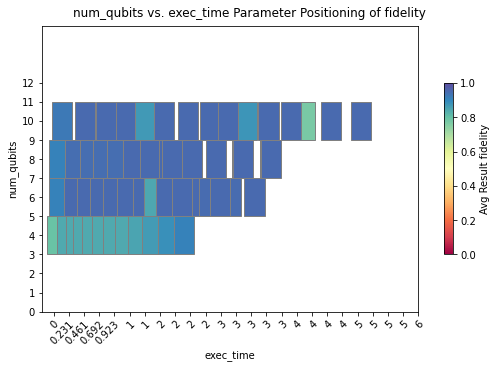

In [6]:
#%run bernstein-vazirani/qiskit/maxcut_benchmark.py
import sys
sys.path.insert(1, "maxcut/qiskit")
import maxcut_benchmark

# set noise to None for testing
import execute
#execute.set_noise_model(None)

maxcut_benchmark.verbose=False

maxcut_benchmark.run(min_qubits=min_qubits, max_qubits=10, max_circuits=max_circuits, num_shots=num_shots,
                method=2, rounds=1, score_metric='max_fidelity', x_metric='cumulative_exec_time', num_x_bins=15, y_size=2.0,
                backend_id=backend_id, provider_backend=provider_backend,
                hub=hub, group=group, project=project, exec_options=exec_options)
print('max_fidelity , with noise')

MaxCut Benchmark Program - Qiskit
... execution starting at 2022-02-16 02:28:13
************
Executing [3] circuits with num_qubits = 4
  ... problem 004 not found, limiting to 1 circuit(s).
************
Average Depth, ξ (xi) for the 4 qubit group = 40, 0.5
Average Transpiled Depth, ξ (xi) for the 4 qubit group = 41, 0.462
Average Creation Time for the 4 qubit group = 0.036 secs
Average Elapsed Time for the 4 qubit group = 4.882 secs
Average Execution Time for the 4 qubit group = 0.268 secs
Average Fidelity for the 4 qubit group = 0.953

************
Executing [3] circuits with num_qubits = 6
************
Average Depth, ξ (xi) for the 6 qubit group = 58, 0.53
Average Transpiled Depth, ξ (xi) for the 6 qubit group = 59, 0.496
Average Creation Time for the 6 qubit group = 0.039 secs
Average Elapsed Time for the 6 qubit group = 5.603 secs
Average Execution Time for the 6 qubit group = 0.34 secs
Average Fidelity for the 6 qubit group = 1.104

************
Executing [3] circuits with num_qu

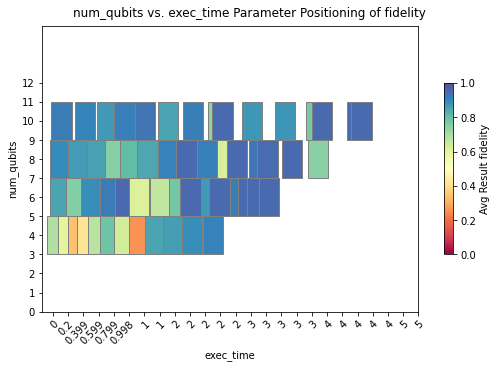

In [8]:
maxcut_benchmark.run(min_qubits=min_qubits, max_qubits=10, max_circuits=max_circuits, num_shots=num_shots,
                method=2, rounds=1, score_metric='fidelity', x_metric='cumulative_exec_time', num_x_bins=15, y_size=2.0,
                backend_id=backend_id, provider_backend=provider_backend,
                hub=hub, group=group, project=project, exec_options=exec_options)
print('fidelity , with noise')

MaxCut Benchmark Program - Qiskit
... execution starting at 2022-02-16 02:29:22
************
Executing [3] circuits with num_qubits = 4
  ... problem 004 not found, limiting to 1 circuit(s).
************
Average Depth, ξ (xi) for the 4 qubit group = 40, 0.5
Average Transpiled Depth, ξ (xi) for the 4 qubit group = 41, 0.462
Average Creation Time for the 4 qubit group = 0.044 secs
Average Elapsed Time for the 4 qubit group = 4.763 secs
Average Execution Time for the 4 qubit group = 0.241 secs
Average Fidelity for the 4 qubit group = 0.949

************
Executing [3] circuits with num_qubits = 6
************
Average Depth, ξ (xi) for the 6 qubit group = 58, 0.53
Average Transpiled Depth, ξ (xi) for the 6 qubit group = 59, 0.496
Average Creation Time for the 6 qubit group = 0.037 secs
Average Elapsed Time for the 6 qubit group = 5.777 secs
Average Execution Time for the 6 qubit group = 0.345 secs
Average Fidelity for the 6 qubit group = 1.125

************
Executing [3] circuits with num_q

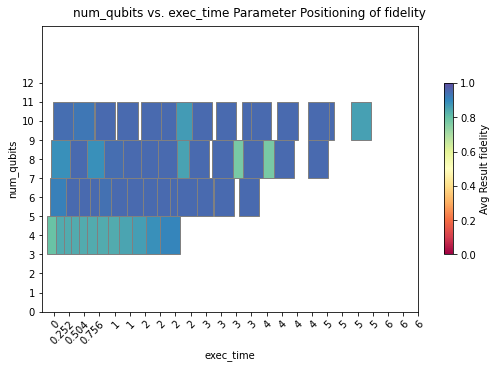

In [9]:
execute.set_noise_model(None)
maxcut_benchmark.run(min_qubits=min_qubits, max_qubits=10, max_circuits=max_circuits, num_shots=num_shots,
                method=2, rounds=1, score_metric='max_fidelity', x_metric='cumulative_exec_time', num_x_bins=15, y_size=2.0,
                backend_id=backend_id, provider_backend=provider_backend,
                hub=hub, group=group, project=project, exec_options=exec_options)
print('max_fidelity , no noise')

MaxCut Benchmark Program - Qiskit
... execution starting at 2022-02-16 02:31:49
************
Executing [3] circuits with num_qubits = 4
  ... problem 004 not found, limiting to 1 circuit(s).
************
Average Depth, ξ (xi) for the 4 qubit group = 40, 0.5
Average Transpiled Depth, ξ (xi) for the 4 qubit group = 41, 0.462
Average Creation Time for the 4 qubit group = 0.04 secs
Average Elapsed Time for the 4 qubit group = 4.869 secs
Average Execution Time for the 4 qubit group = 0.249 secs
Average Fidelity for the 4 qubit group = 0.957

************
Executing [3] circuits with num_qubits = 6
************
Average Depth, ξ (xi) for the 6 qubit group = 58, 0.53
Average Transpiled Depth, ξ (xi) for the 6 qubit group = 59, 0.496
Average Creation Time for the 6 qubit group = 0.034 secs
Average Elapsed Time for the 6 qubit group = 5.516 secs
Average Execution Time for the 6 qubit group = 0.322 secs
Average Fidelity for the 6 qubit group = 1.117

************
Executing [3] circuits with num_qu

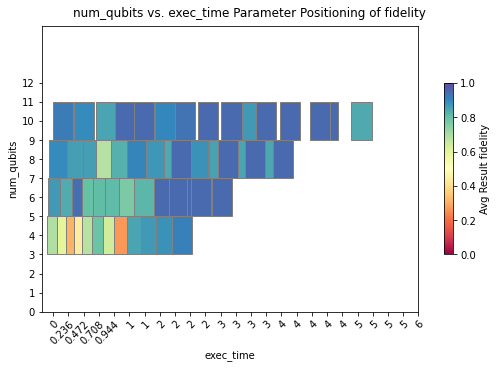

In [11]:
maxcut_benchmark.run(min_qubits=min_qubits, max_qubits=10, max_circuits=max_circuits, num_shots=num_shots,
                method=2, rounds=1, score_metric='fidelity', x_metric='cumulative_exec_time', num_x_bins=15, y_size=2.0,
                backend_id=backend_id, provider_backend=provider_backend,
                hub=hub, group=group, project=project, exec_options=exec_options)
print('fidelity , no noise')

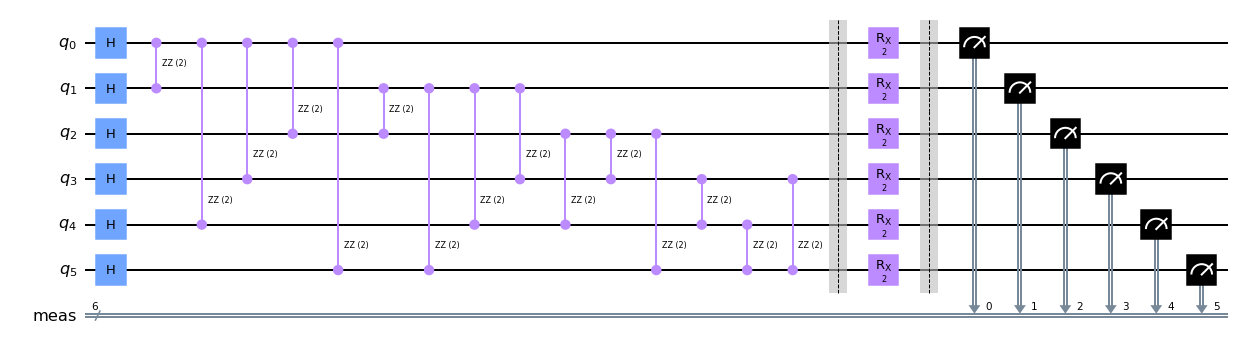

In [24]:
maxcut_benchmark.QC_.draw('mpl',scale=1)
#print(circuit)


The next cell is an auto-generated circuit with beta and gamma set to the optimal parameters (in terms of pi)


Total counts are: {'0110': 128, '0011': 129, '1100': 135, '1110': 19, '0101': 114, '1011': 21, '1010': 130, '0000': 15, '1001': 137, '1101': 27, '0111': 31, '0001': 23, '0100': 25, '0010': 24, '1111': 19, '1000': 23}
         ┌───┐                                                         »
q1500_0: ┤ H ├──■────────────────────■────■────────────────────■────■──»
         ├───┤┌─┴─┐┌──────────────┐┌─┴─┐  │                    │    │  »
q1500_1: ┤ H ├┤ X ├┤ RZ(-0.59062) ├┤ X ├──┼────────────────────┼────┼──»
         ├───┤└───┘└──────────────┘└───┘  │                    │  ┌─┴─┐»
q1500_2: ┤ H ├────────────────────────────┼────────────────────┼──┤ X ├»
         ├───┤                          ┌─┴─┐┌──────────────┐┌─┴─┐└───┘»
q1500_3: ┤ H ├──────────────────────────┤ X ├┤ RZ(-0.59062) ├┤ X ├─────»
         └───┘                          └───┘└──────────────┘└───┘     »
  c17: 4/══════════════════════════════════════════════════════════════»
                                                     

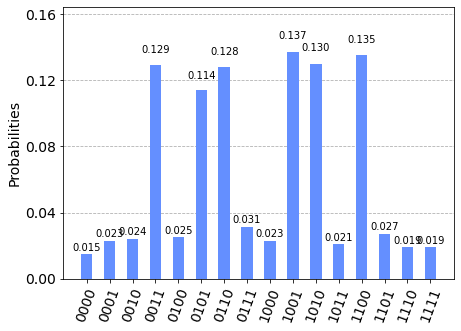

In [25]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

beta = 0.08
gamma = -0.094
cycle_time = 0

qr = QuantumRegister(4)
cr = ClassicalRegister(4)
qc = QuantumCircuit(qr, cr, name="main")
qc.h(qr[0])
qc.h(qr[1])
qc.h(qr[2])
qc.h(qr[3])
qc.cx(qr[0], qr[1])
qc.rz(2*3.14159*gamma, qr[1])
qc.cx(qr[0], qr[1])
qc.cx(qr[0], qr[3])
qc.rz(2*3.14159*gamma, qr[3])
qc.cx(qr[0], qr[3])
qc.cx(qr[0], qr[2])
qc.rz(2*3.14159*gamma, qr[2])
qc.cx(qr[0], qr[2])
qc.cx(qr[1], qr[2])
qc.rz(2*3.14159*gamma, qr[2])
qc.cx(qr[1], qr[2])
qc.cx(qr[1], qr[3])
qc.rz(2*3.14159*gamma, qr[3])
qc.cx(qr[1], qr[3])
qc.cx(qr[2], qr[3])
qc.rz(2*3.14159*gamma, qr[3])
qc.cx(qr[2], qr[3])
qc.rx(2*3.14159*beta, qr[0])
qc.rx(2*3.14159*beta, qr[1])
qc.rx(2*3.14159*beta, qr[2])
qc.rx(2*3.14159*beta, qr[3])
qc.measure(qr[0], cr[0])
qc.measure(qr[1], cr[1])
qc.measure(qr[2], cr[2])
qc.measure(qr[3], cr[3])

from qiskit import execute, Aer
backend = Aer.get_backend("qasm_simulator")  # Use Aer qasm_simulator

job = execute(qc, backend, shots=1000)
result = job.result()
counts = result.get_counts(qc)
print("Total counts are:", counts)

# Draw the circuit
print(qc)

# Plot a histogram
from qiskit.visualization import plot_histogram
plot_histogram(counts)
